<font size ="8"> <div align="center">**Customer Profiling and Data-driven Customer Conversion Prediction**</div></font>
<font size ="5"> <div align="center">By **Jon Nyner Gavan**</div></font>

--------------------
# **Context of the Project (ExtraaLearn)**
--------------------

<p align = "justify">
The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education.

<p align = "justify">
In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms.
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

<p align = "justify">
The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.


------------------------------------
## **Dataset Description**
------------------------------------
<p align = "justify">
The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* `ID`: ID of the lead
* `age`: Age of the lead
* `current_occupation`: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* `first_interaction`: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* `profile_completed`: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* `website_visits`: How many times has a lead visited the website
* `time_spent_on_website`: Total time spent on the website
* `page_views_per_visit`: Average number of pages on the website viewed during the visits.
* `last_activity`: Last interaction between the lead and ExtraaLearn.
    * `Email Activity`: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc
    * `Phone Activity`: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * `Website Activity`: Interacted on live chat with representative, Updated profile on website, etc

* `print_media_type1`: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* `print_media_type2`: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* `digital_media`: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* `educational_channels`: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* `referral`: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* `status`: Flag indicating whether the lead was converted to a paid customer or not.

-----------------------
## **Project Objectives**
-----------------------
<p align = "justify">
ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:

* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers,
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


### **Importing necessary libraries and Dataset Overview**

**Importing Libraries**

In [ ]:
# Importing Libraries for data manipulation
import numpy as np
import pandas as pd

# Importing Libraries for data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Importing Libraries for Model Building
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

# Importing Libaries for Model Tuning
from sklearn.model_selection import GridSearchCV

# Importing Libraries for Model Evaluation
import sklearn.metrics as metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

# Importing other miscellaneous Libraries
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter("ignore", ConvergenceWarning)

**Mounting Google Drve and Loading the dataset**

In [ ]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# Loading Dataset from Google Drive
path = '/content/drive/MyDrive/Classroom/Data Science/MIT Summer School/5 Supervised Learning - Classification and Hypothesis Testing/3 Assessment Project/Dataset - Potential Customer Prediction.csv'
orig = pd.read_csv(path)

In [ ]:
# Making a copy of the original data
data = orig.copy()

**Quick look at the Data**

In [ ]:
#Checking first 5 rows of the data
data.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


In [ ]:
# Checking last 5 rows of the data
data.tail()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
4607,EXT4608,35,Unemployed,Mobile App,Medium,15,360,2.170,Phone Activity,No,No,No,Yes,No,0
4608,EXT4609,55,Professional,Mobile App,Medium,8,2327,5.393,Email Activity,No,No,No,No,No,0
4609,EXT4610,58,Professional,Website,High,2,212,2.692,Email Activity,No,No,No,No,No,1
4610,EXT4611,57,Professional,Mobile App,Medium,1,154,3.879,Website Activity,Yes,No,No,No,No,0
4611,EXT4612,55,Professional,Website,Medium,4,2290,2.075,Phone Activity,No,No,No,No,No,0


**Understanding the shape of the data and its datatypes**

In [ ]:
# Checking the number of rows and columns in the training data
data.shape

(4612, 15)

* The dataset has 4612 rows and 15 columns.

In [ ]:
# let's check the data types of the columns in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

**Checking for Missing Values and Duplicated Rows**

In [ ]:
# Checking number of unique values in each column
data.nunique()

ID                       4612
age                        46
current_occupation          3
first_interaction           2
profile_completed           3
website_visits             27
time_spent_on_website    1623
page_views_per_visit     2414
last_activity               3
print_media_type1           2
print_media_type2           2
digital_media               2
educational_channels        2
referral                    2
status                      2
dtype: int64

In [ ]:
# Checking for duplicated rows
data.duplicated().sum()

0

**Observations:**
- The dataset contains **4612 entries with 15 features** **including the feature of interest** which is whether or not a lead has been converted to a paying customer, denoted by **status**
- numerical columns include:

  `[age, website_visits, time_spent_on_website, page_views_per_visit, status]`

- Categorical columns include:

  `[ID, current_occupation, first_interaction,
  profile_completed, last_activity, print_media_type1, print_media_type2, digital_media, educational_channels, referral]`

- The dataset has **no duplicated entries**
- From the results above, **categorical columns only contain either 2 or 3 unique entries** except for **lead ID which has 4612 unique entries** and will probably **not provide any insight** for this case study

### **Exploratory Data Analysis (EDA)**

In [ ]:
# First drop the ID column as it has no significant information to give in this study
data.drop(["ID"], axis = 1, inplace = True)
data.head()

,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


#### **Univariate Analysis**

> **Looking at Distributions of Numerical Columns**



In [ ]:
# Defining a useful Function that plots a boxplot and histrogram of numerical feature

def hist_boxplot(data, feature, figsize=(15, 6), kde = False, bins = None):
    """
    data: dataframe
    feature: dataframe column
    figsize: size of figure
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows = 2,      # Number of rows of the subplot grid = 2
        sharex = True,  # x-axis will be shared among all subplots
        gridspec_kw = {"height_ratios": (0.3, 0.7)},
        figsize = figsize)

    # Create a boxplot that shows the mean
    sns.boxplot(data = data, x = feature, ax = ax_box2, showmeans = True, color = "red")

    # Create a histogram conditional on the value of parameter 'bins'
    if bins:
      sns.histplot(data = data, x = feature, kde = kde, ax = ax_hist2, bins = bins, palette = "winter")
    else:
      sns.histplot(data = data, x = feature, kde = kde, ax = ax_hist2)

    # Adding lines that show the mean and mediam to the historgram plot
    ax_hist2.axvline(data[feature].mean(), color = "orange", linestyle = "--")
    ax_hist2.axvline(data[feature].median(), color = "black", linestyle = "-")

In [ ]:
# Checking Statistical Parameters of the numerical features
num_cols = ['age', 'website_visits','time_spent_on_website','page_views_per_visit']
data[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
age,4612.0,46.201214,13.161454,18.0,36.00000,51.000,57.00000,63.000
website_visits,4612.0,3.566782,2.829134,0.0,2.00000,3.000,5.00000,30.000
time_spent_on_website,4612.0,724.011275,743.828683,0.0,148.75000,376.000,1336.75000,2537.000
page_views_per_visit,4612.0,3.026126,1.968125,0.0,2.07775,2.792,3.75625,18.434


**Looking at `Age`**

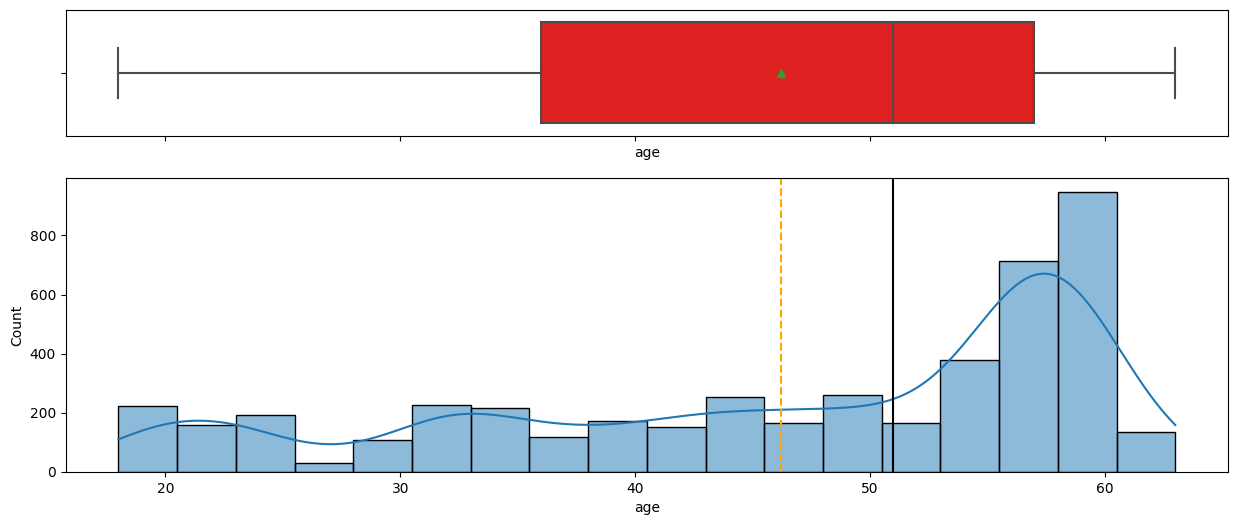

In [ ]:
# plotting age distribution
hist_boxplot(data, 'age', kde = True)

- The **average age of leads is 46 year**s old with the **youngest being 18** and the **oldest being 63 years old**
- From the results, the mean is lower than the median which is also lower than the mode, signifying that the** Age distribution is left-skewed**
- From the box ploot no significant outliers seem to be present

**Looking at `website_visits`**

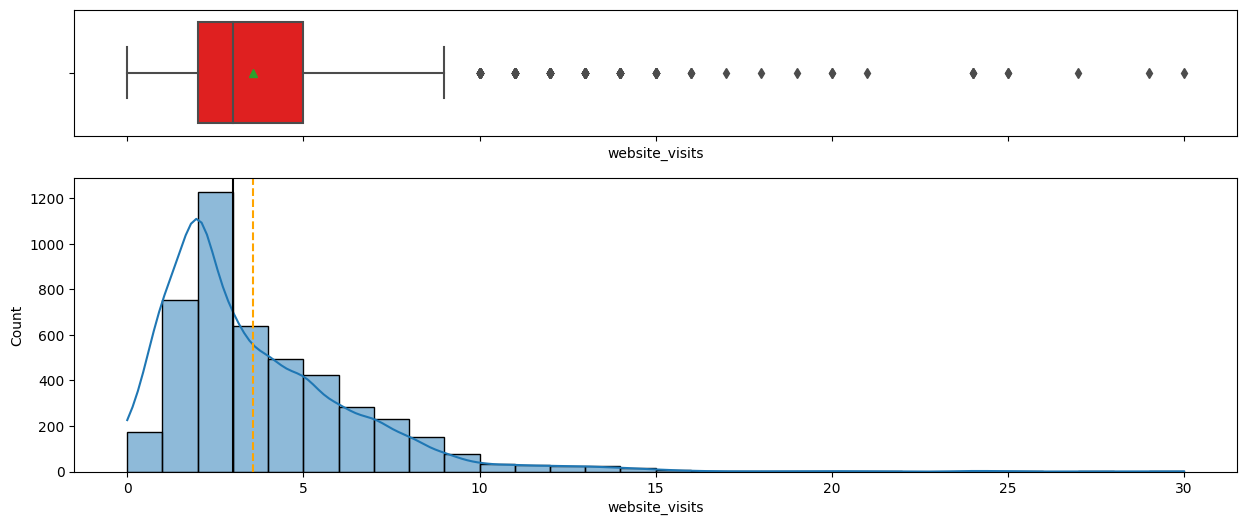

In [ ]:
# plotting website_visits distribution
hist_boxplot(data, 'website_visits', kde = True, bins = 30)

- The **average number of website visits is around 4** (rounded up) with the **minimum being no visit** and **maximum going as high as 30 times**
- From the results, the mean is higher than the median which is also higher than the mode, signifying that the** Age distribution is right-skewed**
- From the box ploot, **significant outliers seem to be present** to the right hence it might be important to note that the m**ost frequent number of website visits is around 3 times**


**Looking at `time_spent_on_website`**

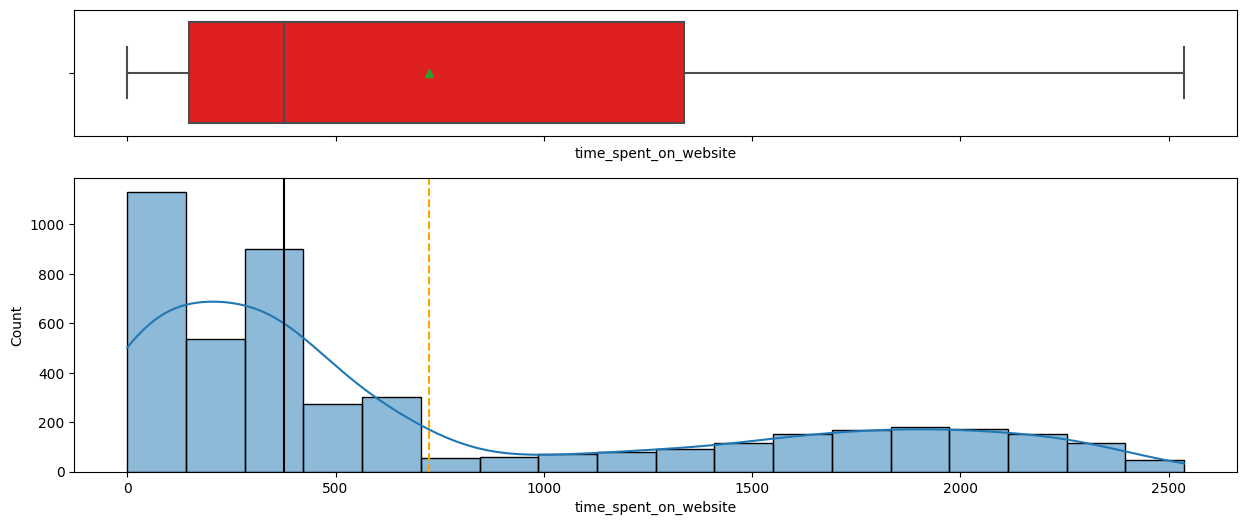

In [ ]:
# plotting time_spent_on_website distribution
hist_boxplot(data, 'time_spent_on_website', kde = True)

- The **average time spent on website is aroundd 724 seconds** (rounded up) with the **minimum being 0 seconds** and **maximum going as long as 2537 seconds**
- From the results, similar to number of website visits, the mean is higher than the median which is also higher than the mode, signifying that the **time spent on website is right-skewed**
- From the histogram, it can also be seen that **most of those who visit** the website **spend less than 400 seconds**

**Looking at `page_views_per_visit`**

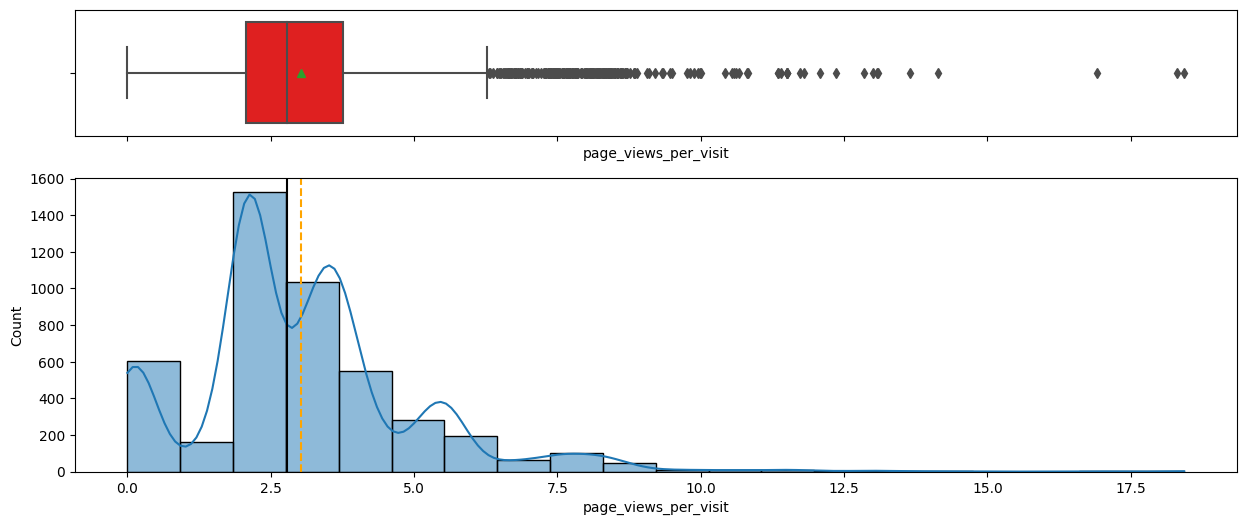

In [ ]:
# plotting page_views_per_visit distribution
hist_boxplot(data, 'page_views_per_visit', kde = True, bins =20)

- The **average number of page views per vist is around 3** with the **minimum being 0** and **maximum being as many as 18**
- From the results, the mean is higher than the median signifying that the** page views per visit is right-skewed**
- From the box ploot, **significant outliers seem to be present** to the right
- from the histogram, it can also be seen that the distribution is multimodal with the **most frequent number of pages viewed** are around **0, 2, 3 and to some extent, 6**

> **Looking at Distributions of Categorical Columns**

In [ ]:
# Defining a Function that creates barplots with percentage labels

def labeled_barplot(data, feature):
    """
    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])                  #length of the column
    count = data[feature].nunique()
    plt.figure(figsize=(count + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(data = data, x = feature, palette = "Paired")

    for p in ax.patches:
      label = "{:.1f}%".format(100 * p.get_height() / total)                    # percentage of each class of the category

      x = p.get_x() + p.get_width() / 2  # width of the plot
      y = p.get_height()  # height of the plot

      ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points")  # annotate the percentage

    plt.show()  # show the plot

**Looking at `current_occupation`**

Professional    2616
Unemployed      1441
Student          555
Name: current_occupation, dtype: int64


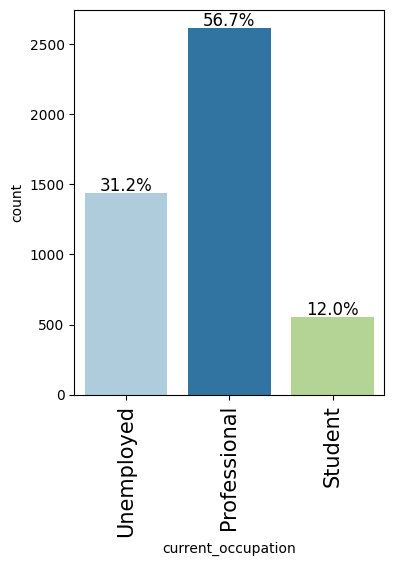

In [ ]:
# Applying plotting function on current_occupation column
print(data['current_occupation'].value_counts())
labeled_barplot(data, "current_occupation")

* Over half of the leads are Professionals and Students are the least in number


**Looking at `first_interaction`**

Website       2542
Mobile App    2070
Name: first_interaction, dtype: int64


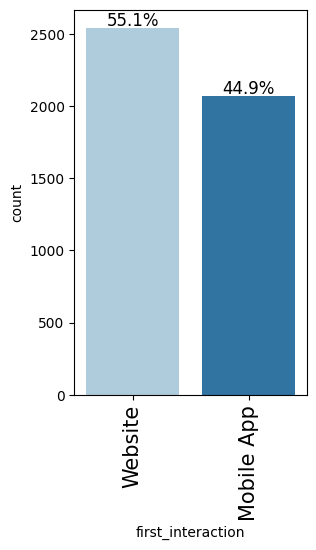

In [ ]:
# Applying plotting function on first_interaction column
print(data['first_interaction'].value_counts())
labeled_barplot(data, "first_interaction")

* Leads who had first interactions in the website are more in number compared to those who had first interactions in the mobile app (but not by much)


**Looking at `profile_completed`**

High      2264
Medium    2241
Low        107
Name: profile_completed, dtype: int64


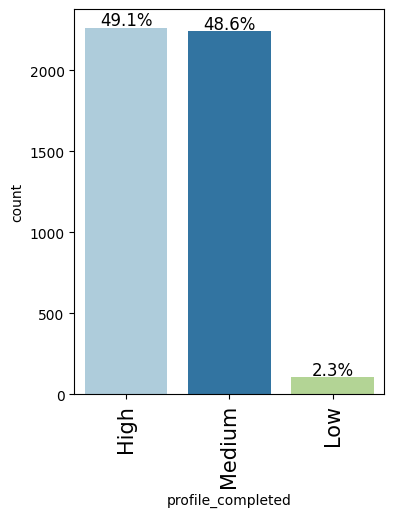

In [ ]:
# Applying plotting function on profile_completed column
print(data['profile_completed'].value_counts())
labeled_barplot(data, "profile_completed")

* Among the leads, there **are very few who have low profile completion**, and those that have medium and high profile completions are relatively the same in number

**Looking at `last_activity`**

Email Activity      2278
Phone Activity      1234
Website Activity    1100
Name: last_activity, dtype: int64


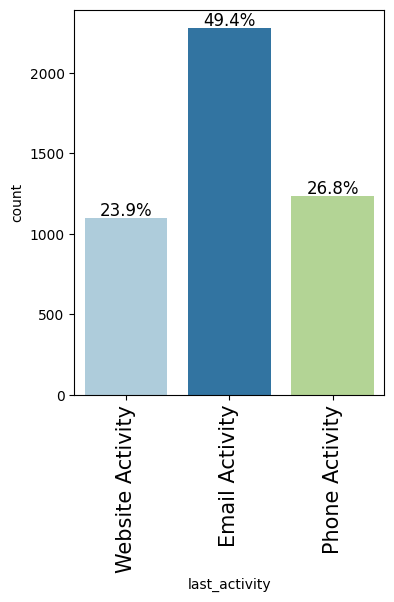

In [ ]:
# Applying plotting function on last_activity column
print(data['last_activity'].value_counts())
labeled_barplot(data, "last_activity")

* **Leads who had activity in emails make up around half of the data** and those who had website and phone activity make up the same amount

**Looking at `print_media_type1`**

No     4115
Yes     497
Name: print_media_type1, dtype: int64


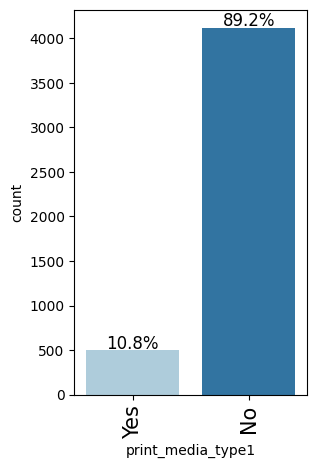

In [ ]:
# Applying plotting function on print_media_type1 column
print(data['print_media_type1'].value_counts())
labeled_barplot(data, "print_media_type1")

**Looking at `print_media_type2`**

No     4379
Yes     233
Name: print_media_type2, dtype: int64


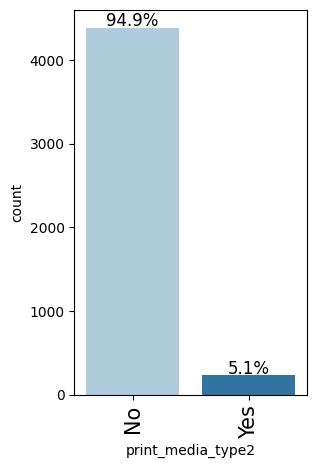

In [ ]:
# Applying plotting function on print_media_type2 column
print(data['print_media_type2'].value_counts())
labeled_barplot(data, "print_media_type2")

* **Most of the leads had not seen the ad** on not only both newspapers and magazines but also in online media

**Looking at `digital_media`**

No     4085
Yes     527
Name: digital_media, dtype: int64


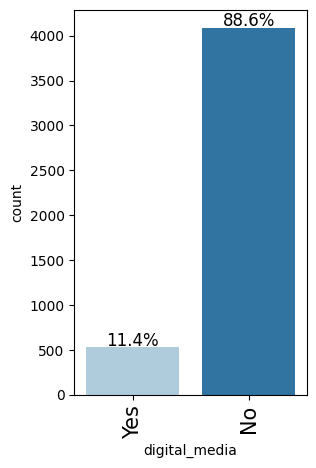

In [ ]:
# Applying plotting function on digital_media column
print(data['digital_media'].value_counts())
labeled_barplot(data, "digital_media")

**Looking at `educational_channels`**

No     3907
Yes     705
Name: educational_channels, dtype: int64


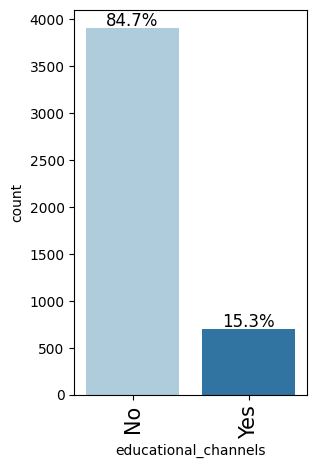

In [ ]:
# Applying plotting function on education_channels column
print(data['educational_channels'].value_counts())

labeled_barplot(data, "educational_channels")

* Similar trend observed in that **only few of the leads** had **heard** about ExtraaLearn **in educational channels**

**Looking at `referral`**

No     4519
Yes      93
Name: referral, dtype: int64


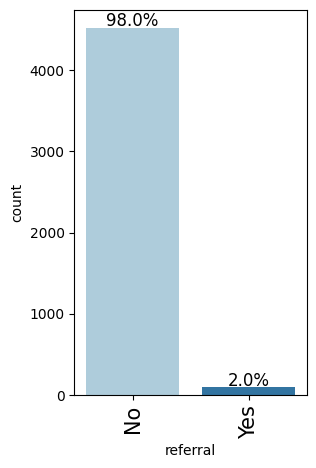

In [ ]:
# Applying plotting function on referral column
print(data['referral'].value_counts())
labeled_barplot(data, "referral")

* **Very few** of the leads have heard of ExtraaLearn via Referrals

**Looking at `status`**

0    3235
1    1377
Name: status, dtype: int64


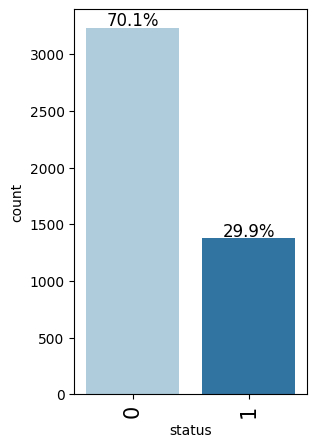

In [ ]:
# Applying plotting function on status column
print(data['status'].value_counts())
labeled_barplot(data, "status")

* Only around 30% of the Leads have been converted to paying customers

#### **Bivariate and Multivariate Analysis**


> **Investigating the Correlation of numerical features with one another, and with the target variable**

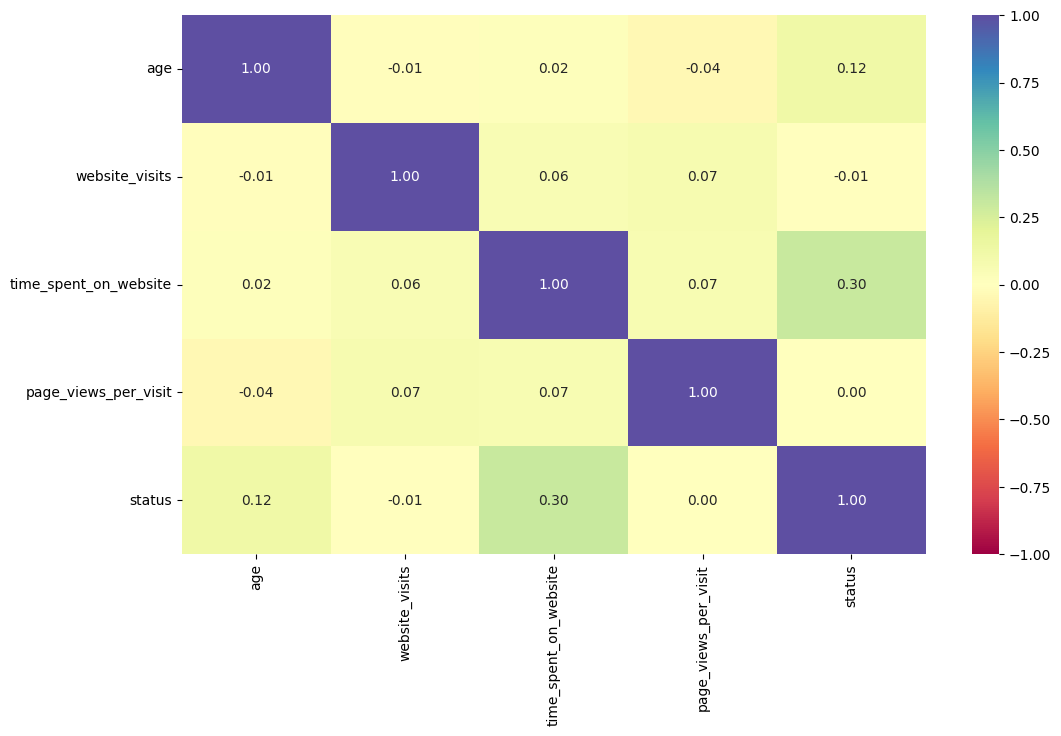

In [ ]:
# Creating a Heatmap showing correlations of numerical features with one another and with the Target
num_cols = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(data[num_cols].corr(), annot = True, vmin = -1, vmax = 1, fmt=".2f", cmap="Spectral")
plt.show()

* From the heat map of feature correlations, it can be seen that **`time_on_the_website` has the highest positive correlation on the target variable (0.3)** Signifying that **leads who spend more time on the website** could have **higher possibility of becoming paying customers**.

* This is **followed by `age`**, albeit only **having a positive correlation of 0.12**. Nevertheless, **this could mean that age has somewhat of an effect** on the decision of a lead to become a paying customer.

* Other numerical features seem to have no correlation with one another and with the target variable

**To further analyze the effect of each numerical column**, we can **examine the distribution of the two classes** (converted and uncoverted leads) **on the various numerical columns**

> **Distribution of each numerical column for each category will also visualized and analyzed**

In [ ]:
# Defining a function to plot distribution of the two target classes on each numerical feature
# This will help in the analysis of the effects of numerical features on the target variable


def distribution_within_class(data, predictor, target):
    fig, axs = plt.subplots(2, 2, figsize=(10, 8))
    target_uniq = data[target].unique()

    #Generating Histograms of the feature within the two classes
    sns.histplot(data = data[data[target] == target_uniq[0]], x = predictor,
                 kde = True, ax = axs[0, 0], color="teal", stat="density")
    axs[0, 0].set_title(predictor + " Distribution of Converted Leads")

    sns.histplot(data=data[data[target] == target_uniq[1]],x=predictor,
                 kde=True, ax=axs[0, 1], color="orange", stat="density")
    axs[0, 1].set_title(predictor + " Distribution of Unconverted Leads")

    #Generating Boxplots of the feature within the two classes
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")
    axs[1, 0].set_title("Boxplot w.r.t target")

    sns.boxplot(data=data,x=target,y=predictor,ax=axs[1, 1],showfliers=False, palette="gist_rainbow")
    axs[1, 1].set_title("Boxplot w.r.t target without outliers")

    plt.tight_layout()
    plt.show()

**Checking Age Distribution of Converted and Unconverted Leads**

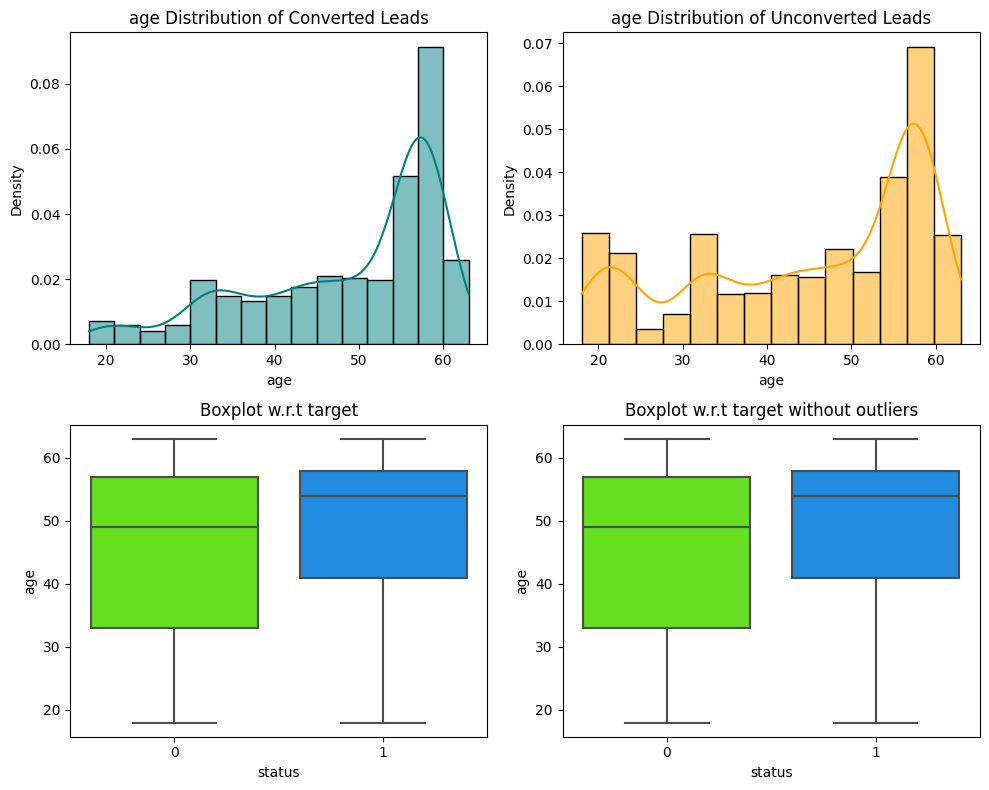

In [ ]:
# Applying the plotting function to check age distribution of converted and unconverted leads
distribution_within_class(data, 'age', 'status')

* Closely **examining the distribution of converted leads** it can be noticed that **younger leads (ages 20-30) opt out of the company's product** and it is instead **those who are 50-60 yrs old who make up most of the customers**.
* **However, on checking the histogram and boxplots** of Both converted and unconverted leads across age, **it can be seen that the distributions are somewhat similar**.
* This means that the **chance of older leads not becoming customers is just as high**. This signifies that age may not be a very big contributor in the decision making process of leads



**Checking Website_visits distribution of Converted and Unconverted Leads**

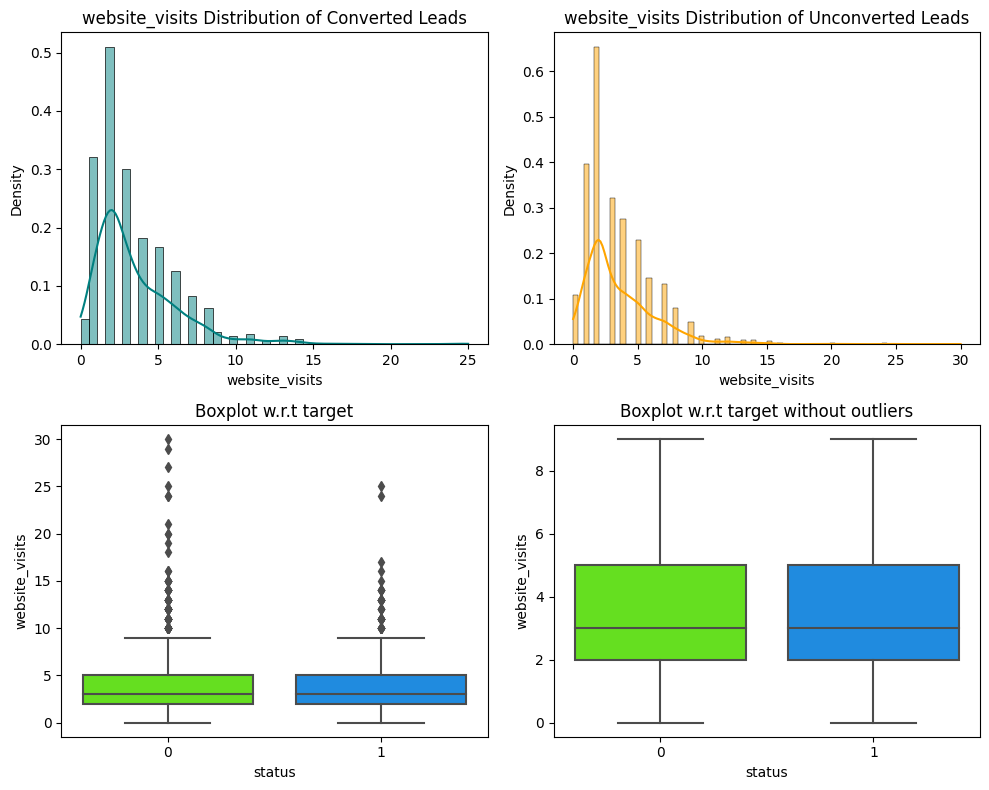

In [ ]:
# Applying the plotting function to check website visits distribution of converted and unconverted leads
distribution_within_class(data, 'website_visits', 'status')

* A similar analysis can be made with the number of website visits. i**t can be seen that the distributions are similar for converted and uncoverted leads**.
* Meanwhile most **converted leads are shown to be people who have visited the website 1-3 times**. On the other hand, **boxplots show the presence of outliers for both target classes**.



**Checking distribution of time spent on website of Converted and Unconverted Leads**

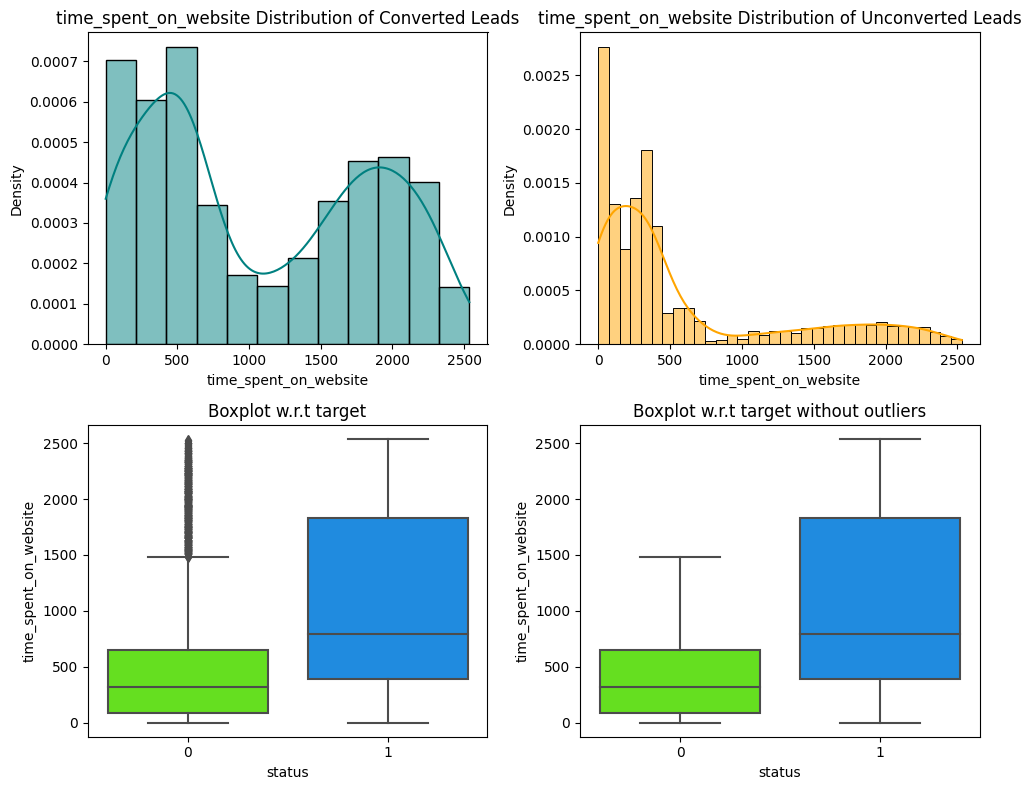

In [ ]:
# Applying the plotting function to check time spent on website distribution of converted and unconverted leads
distribution_within_class(data, 'time_spent_on_website', 'status')

* At first glance **it can be seen that the distributions** of converted and uncoverted leads across this numerical feature **are vastly different**.
* **Distribution of converted leads seems to be bimodal, showing that those who have spent 0-500s and 1500-2500s ended up being major portions of the customers**.
* On the other hand this **behavior is not seen on the distribution of unconverted leads, whose boxplot show the presence of outliers**.
* This could mean that the amount of time spent on the website could be a good indicator on wether or not a lead has a high chance of turning into a paying customer


**Checking distribution of page views per visit of Converted and Unconverted Leads**

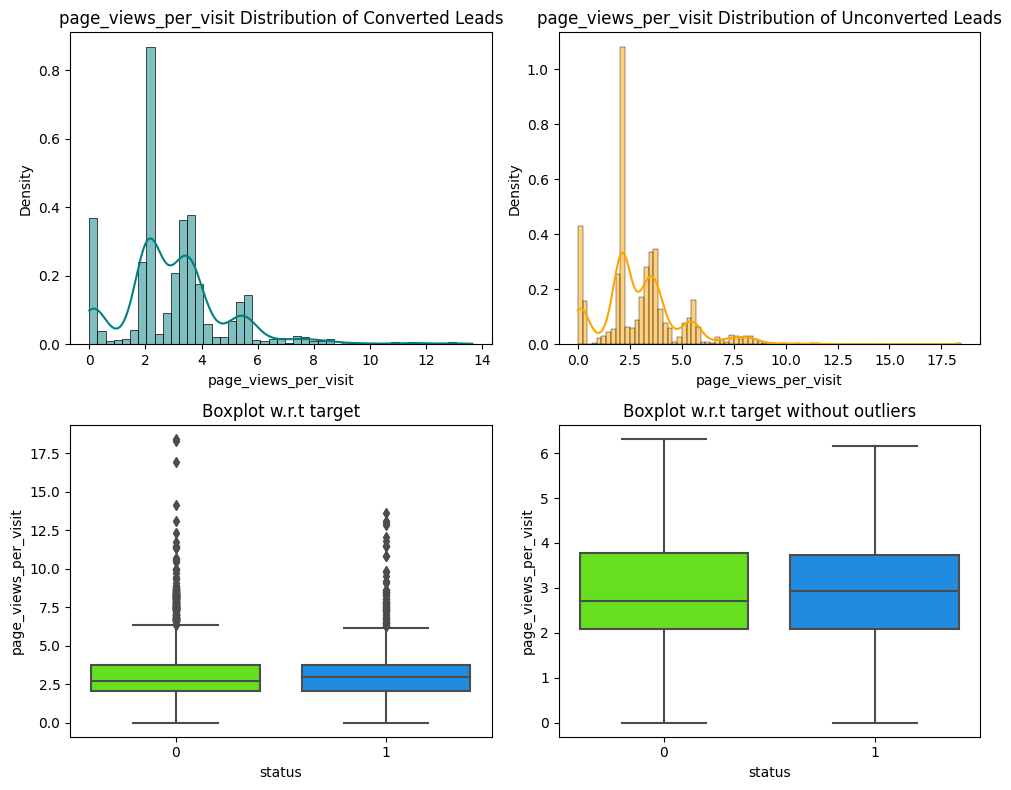

In [ ]:
# Applying the plotting function to check page views per visit distribution of converted and unconverted leads
distribution_within_class(data, 'page_views_per_visit', 'status')

* The behavior of the distributions of converted and unconverted leads across this feature is the same (both multi-modal). Analysis is the same as that of age and number of Website Visits

> **Checking the effect of categorical features on the target variable**

In [ ]:
# Defining a function to create stacked barplot that will show how many of each
# class of every categorical feature become converted leads
# This will help in the analysis of categorical features on the Target Variable
# tab2 = (pd.crosstab(data[predictor], data[target], normalize= "index")*100).sort_values(by=sorter_index, ascending=False)

def stacked_barplot(data, predictor, target):
    """
    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter_index = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins = True).sort_values(by=sorter_index, ascending=False)
    print(tab1)

    print("-" * 100)

    tab2 = (pd.crosstab(data[predictor], data[target], normalize= "index")*100)
    tab2.plot(kind="bar", stacked=True, figsize=(count + 3, 5))
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

**Checking effect of `current_occupation` on target variable `status`**

status                 0     1   All
current_occupation                  
All                 3235  1377  4612
Professional        1687   929  2616
Unemployed          1058   383  1441
Student              490    65   555
----------------------------------------------------------------------------------------------------


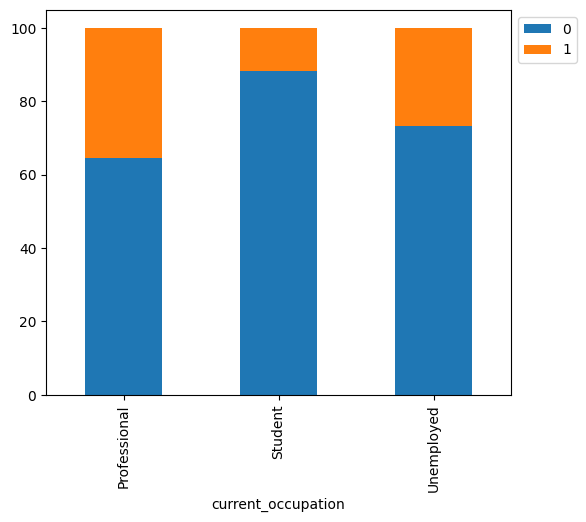

In [ ]:
# Applying the plotting function on current_occupation and status
stacked_barplot(data, "current_occupation", "status")

* Leads who are at the professional level have the highest conversion rates. Followed by those who are unemployed and finally those who are still at the student level.
* From this it can be postulated that the company's program could be more appealing to those who are already working and are looking to expand/change their skillsets

**Checking effect of `first_interaction` on target variable `status`**

status                0     1   All
first_interaction                  
All                3235  1377  4612
Website            1383  1159  2542
Mobile App         1852   218  2070
----------------------------------------------------------------------------------------------------


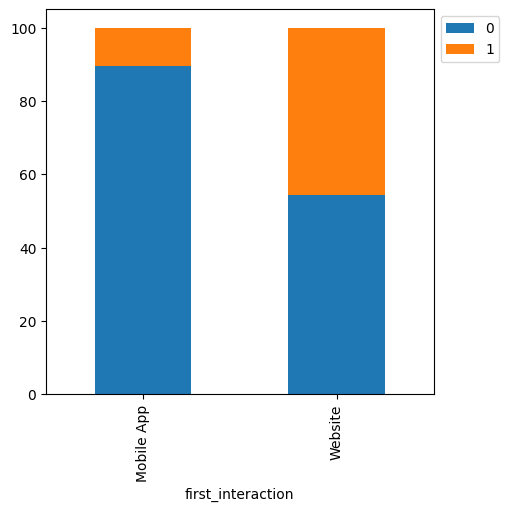

In [ ]:
# Applying the plotting function on first_interaction and status
stacked_barplot(data, "first_interaction", "status")

* While Leads are somwhat equally distributed between those who have mobile and website as first interactions,it can be seen that leads who had first interactions in the website have a higher conversion rate
* This could mean that the first impression brought about by the website offers significant impact on the lead's decision making process

**Checking effect of `profile_completed` on target variable `status`**

status                0     1   All
profile_completed                  
All                3235  1377  4612
High               1318   946  2264
Medium             1818   423  2241
Low                  99     8   107
----------------------------------------------------------------------------------------------------


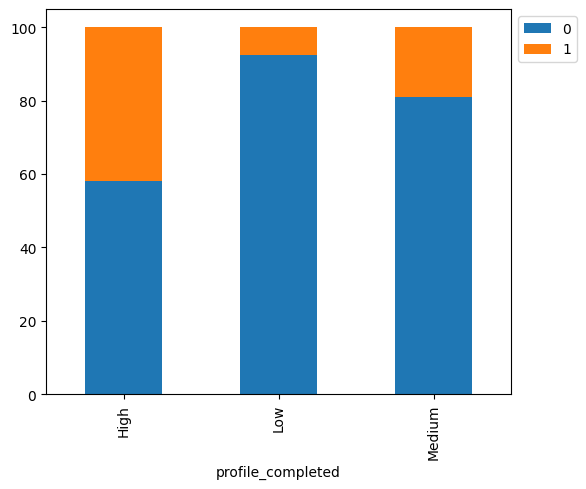

In [ ]:
# Applying the plotting function on profile_completed and status
stacked_barplot(data, "profile_completed", "status")

* Most of the converted leads are Those who have high completion rates of their profiles, followed by those who have medium completion rates.
* This could mean that leads who put the effort to complete their profiles have higher chance of becoming customers
* Another way to view this could be that having more information on the lead (higher profile completoion) may also aid in convincing them to become customers

**Checking effect of `last_activity` on target variable `status`**

status               0     1   All
last_activity                     
All               3235  1377  4612
Email Activity    1587   691  2278
Website Activity   677   423  1100
Phone Activity     971   263  1234
----------------------------------------------------------------------------------------------------


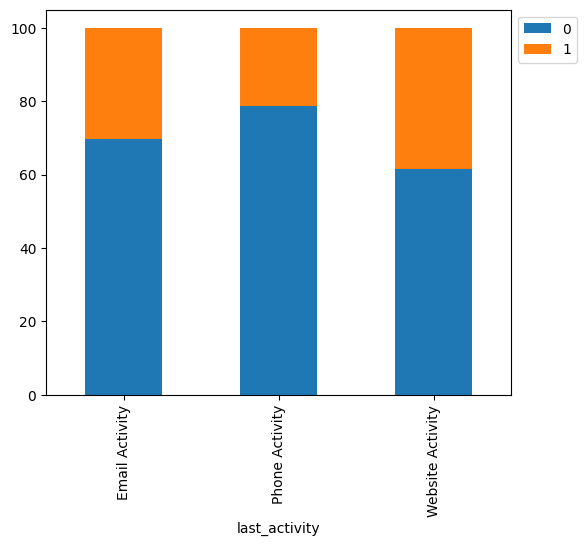

In [ ]:
# Applying the plotting function on last_activity and status
stacked_barplot(data, "last_activity", "status")

* On closer look at the stacked barplot, it can be seen that those who had website activity have the largest ratio of converted leads.
* However, looking at the absolute counts of the converted lead in each category, it can be seen that leads who had email activity make up around half of the total number converted leads
* From the results of the analysis, interaction via website can be seen to have a good effect in convincing leads
* However, efforts on email interactions should also be kept up

**Checking effect of product exposure (`print_media_type1-2, digital_media` and `educational_channel`) on target variable `status`**

status                0     1   All
print_media_type1                  
All                3235  1377  4612
No                 2897  1218  4115
Yes                 338   159   497
----------------------------------------------------------------------------------------------------


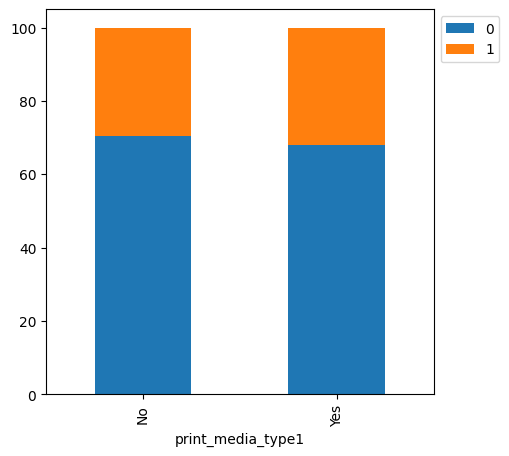

In [ ]:
# Applying the plotting function on print_media_type1 and status
stacked_barplot(data, "print_media_type1", "status")

status                0     1   All
print_media_type2                  
All                3235  1377  4612
No                 3077  1302  4379
Yes                 158    75   233
----------------------------------------------------------------------------------------------------


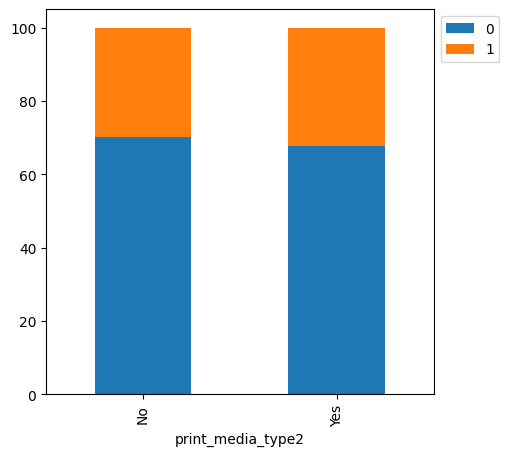

In [ ]:
# Applying the plotting function on print_media_type2 and status
stacked_barplot(data, "print_media_type2", "status")

status            0     1   All
digital_media                  
All            3235  1377  4612
No             2876  1209  4085
Yes             359   168   527
----------------------------------------------------------------------------------------------------


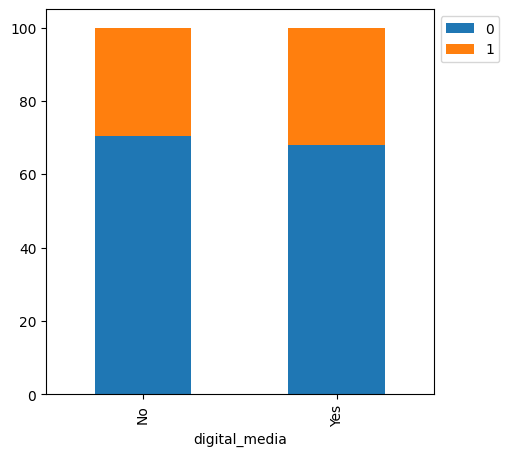

In [ ]:
stacked_barplot(data, "digital_media", "status")

status                   0     1   All
educational_channels                  
All                   3235  1377  4612
No                    2727  1180  3907
Yes                    508   197   705
----------------------------------------------------------------------------------------------------


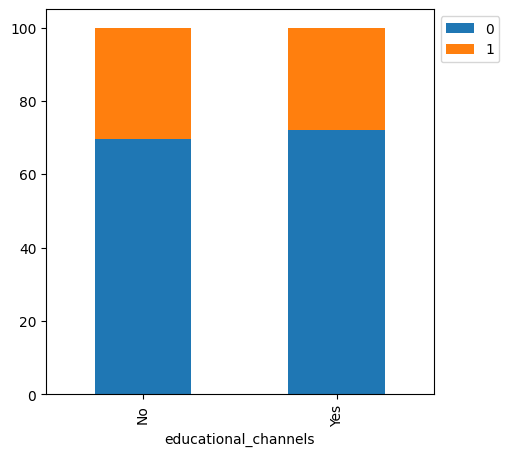

In [ ]:
# Applying the plotting function on educational_channels and status
stacked_barplot(data, "educational_channels", "status")

* Exposure (Print Media Type 1&2, and Online Media, educational channels) plots show almost the same behavior.
* Speaking in terms of absolute number of converted leads, very few of them actually have had exposure to the company and its program not only in all Three media but also educational channels.




**Checking effect of `referral` on target variable `status`**

status       0     1   All
referral                  
All       3235  1377  4612
No        3205  1314  4519
Yes         30    63    93
----------------------------------------------------------------------------------------------------


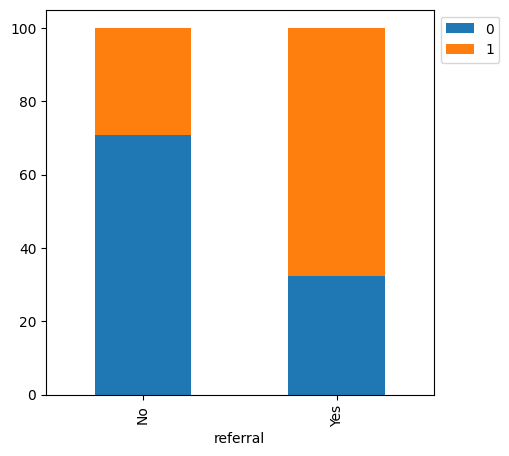

In [ ]:
# Applying the plotting function on referral and status
stacked_barplot(data, "referral", "status")


**Referrals:** It can be seen that a majority of those who have heard of the company and its program have become paying customers. However, checking the absolute values reveal that those who belong to the category of referrals are actually part of a very small group of the entire list of leads.
- Purely judging based on conversion rate, it can be seen that leads who have been referred to the company are more likely to become customers
- This could mean that testimonies from other people have significant impacts on the decision making process of the leads
- Therefore more efforst should be put into ensuring more and more leads are referred to the company



### **Data Preprocessing for Modeling**

**Outlier Detection and Analysis**

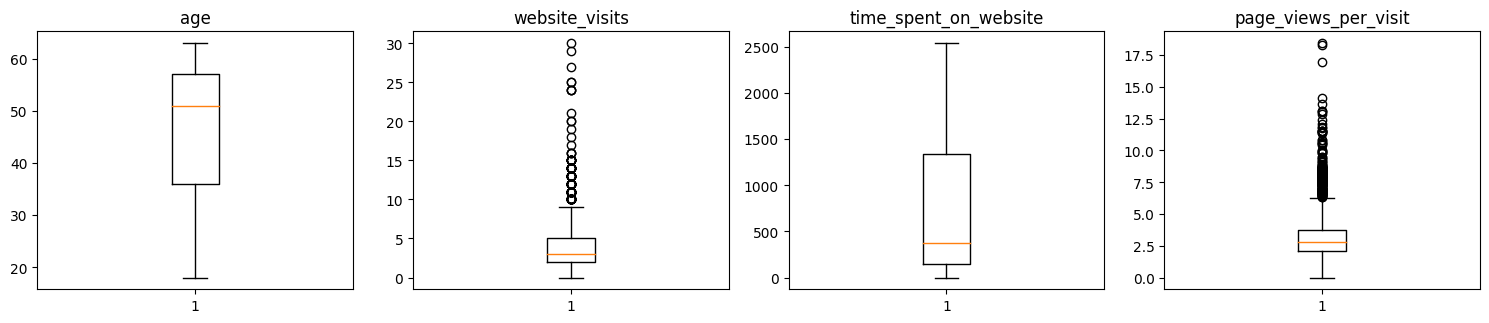

In [ ]:
# Analyzing Outliers of numerical Features
test_num_cols = ['age', 'website_visits', 'time_spent_on_website', 'page_views_per_visit']

plt.figure(figsize=(15, 12))
for i, feature in enumerate(test_num_cols):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[feature], whis=1.5)
    plt.tight_layout()
    plt.title(feature)

plt.show()

* **No outliers** can be seen **for Age and Time spent** on the Website
* On the other hand, **Website Visits and Page views per visit**  are shown to have outliers.
* However, **as seen in the bivariate analysis from before**, the **distribution of converted and unconverted leads are the same (even the presence of outliers)** over these features.
  * Further add to the fact that **Tree-based classifiers are relatively robust to outliers**.
  * Therefore these **outliers can be retained** and we can proceed with the model building.

**Encoding Categorical Variables**

In [ ]:
# Encoding categorical features by gettting dummy variables
# parameter drop_first is set to True to avoid reduntant variables (variables will not be independent with one another)

data = pd.get_dummies( data, columns = data.select_dtypes(include = ["object", "category"]).columns.tolist(),drop_first = True)

**Separating Independent and Dependent variables**

In [ ]:
# Spearating independent variables and the target variable
x = data.drop('status', axis = 1)
y = data['status']

**Splitting Data into Training and Testing sets**

In [ ]:
# Splitting dataset into train and test datasets
# Test size is set to 30%
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1)


**Final re-checking of the Data before modeling**

In [ ]:
# Viewing the first 5 rows of the independent variable
x.head()

,age,website_visits,time_spent_on_website,page_views_per_visit,current_occupation_Student,current_occupation_Unemployed,first_interaction_Website,profile_completed_Low,profile_completed_Medium,last_activity_Phone Activity,last_activity_Website Activity,print_media_type1_Yes,print_media_type2_Yes,digital_media_Yes,educational_channels_Yes,referral_Yes
0,57,7,1639,1.861,0,1,1,0,0,0,1,1,0,1,0,0
1,56,2,83,0.320,0,0,0,0,1,0,1,0,0,0,1,0
2,52,3,330,0.074,0,0,1,0,1,0,1,0,0,1,0,0
3,53,4,464,2.057,0,1,1,0,0,0,1,0,0,0,0,0
4,23,4,600,16.914,1,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
# Viewing the first 5 rows of the target variable
y.head()

0    1
1    0
2    0
3    1
4    0
Name: status, dtype: int64

In [ ]:
# Checking the shape of the dependent variable in the training dataset
print(x_train.shape)

# Checking the distribution of the two outcomes in the target column
print(y_train.value_counts(1))

(3228, 16)
0    0.704151
1    0.295849
Name: status, dtype: float64


In [ ]:
# Checking the shape of the dependent variable in the testing dataset
print(x_test.shape)

# Checking the distribution of the two outcomes in the target column
print(y_test.value_counts(1))

(1384, 16)
0    0.695087
1    0.304913
Name: status, dtype: float64


**Observations**:
- Dummy variables have been created for the categorical features of the dataset
- Number of columns for x is still close to the original since most of the categorical features only had 2-3 classes. Since get_dummies was applied with parameter drop_first = True, number of columns in the resulting dataset did not increase that much
- distribution of Target variable classes 0 and 1 are relatively the same for Training and Test data (~ 0.3 for Class 1 and ~0.7 for Class 0)

### **Building Classifier ML models**

**Working Strategy for Model Building:**

For classification problems **each type o rror can be minimized** **at the expense of increasing the other type of error**. Hence, moving forward, one must choose which error to prioritize by analyzing the consequences each error will have on the company.
- considering the false positive, the company will only lose resources on convincing a potential customer.
- On the other hand, the false negative error will cause to company to outright miss a potential customer
- Further supposing that the company has enough resources to spend on cultivating/convincing customers, the **loss resulting from the false positive error is seemingly less important** compared to the loss of completely missing out on some potential customers

That is why for the remainder of this study, we will **focus on minimizing the False negative error** by **maximizing the classifier's Recall property**

In [ ]:
# Defining a function to print the results of the classification error and create a plot to visualize the confusion matrix
# We will use classification_report metric and confusion matrix that were imported earlier

def classifier_score(actual, predicted):
  # Applying the methods imported
  print(classification_report(actual, predicted))
  confusion_mat = confusion_matrix(actual, predicted)

  # Using Heatmap to visualize the matrix
  plt.figure(figsize = (8, 5))
  sns.heatmap(confusion_mat, annot = True,  fmt = '.2f', xticklabels = ['Not Converted', 'Converted'], yticklabels = ['Not Converted', 'Converted'])
  plt.ylabel('Actual')
  plt.xlabel('Predicted')
  plt.show()

#### **Decision Tree Classifier**

> **Initial Model Buildnig**

In [ ]:
# Instantiating a Decision Tree classifyier model
DTree = DecisionTreeClassifier()

# Fitting the Training Data
DTree.fit(x_train, y_train)

DecisionTreeClassifier()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2273
           1       1.00      1.00      1.00       955

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



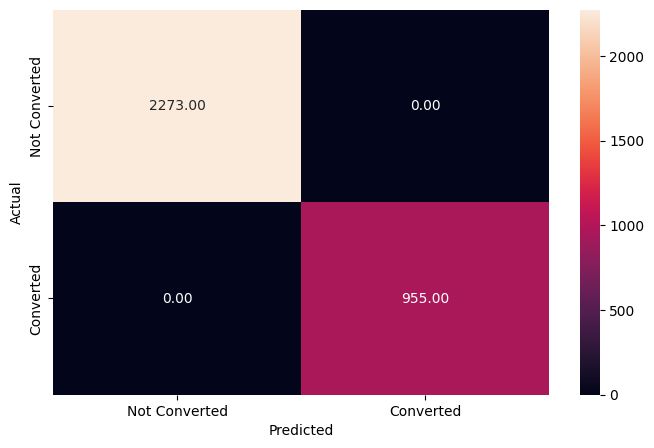

In [ ]:
# Checking the model performance on the Training set
DTree_y_train_pred = DTree.predict(x_train)
classifier_score(y_train, DTree_y_train_pred)

**Observations**
- Looking at the confusion matrix, It can be seen that there are No False positives and False negatives
- Despite the high values of precision. recall, accuracy, and f1-score, this result seems fishy and could be **indicative of overfitting**


              precision    recall  f1-score   support

           0       0.87      0.87      0.87       962
           1       0.70      0.70      0.70       422

    accuracy                           0.82      1384
   macro avg       0.78      0.78      0.78      1384
weighted avg       0.82      0.82      0.82      1384



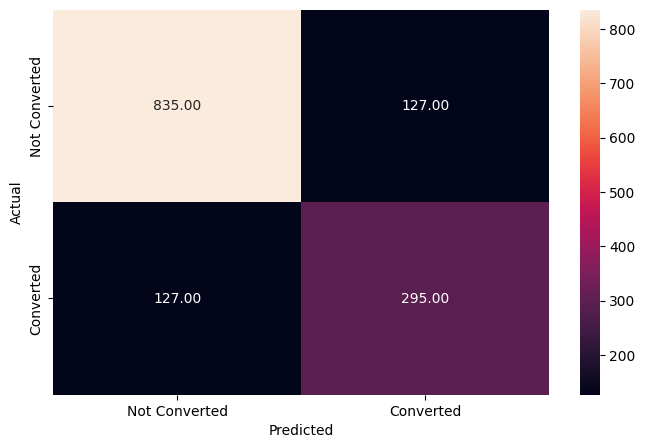

In [ ]:
# Checking the performance of the Model on the Test dataset
DTree_y_test_pred = DTree.predict(x_test)
classifier_score(y_test, DTree_y_test_pred)

**Observations**
- Upon testing the trained model on the test data, it can be seen that the **model performance indicators have all reduced** confirming that indeed the previous model overfitted and has relatively poor generalization capabilities over unseen data
- The results show that our **main metric, the recall_score for category 1** is at 0.70, which can be considered low
- **Optimization on model parameters can be done to increase this metric**

> **Optimizing the Decision Tree Classifier using Hyperparameter Tuning**

In [ ]:
# Optimizing the Classifier via Hyperparameter Tuning using GridSearchCV method
# This is done to reduce overfitting of themodel

DTree_tuned = DecisionTreeClassifier(random_state = 1, class_weight = {0: 0.3, 1: 0.7})

# Setting the parameters that will be passed through in the grid search algorithm
params = {'max_depth': np.arange(2,15), 'criterion': ['gini', 'entropy'], 'min_samples_leaf': [5, 10, 20, 25]}

# setting the recall_score to be the scorer
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Running the grid search
gridsearch_obj = GridSearchCV(DTree_tuned, param_grid = params, scoring = scorer, cv = 10)

# Fitting the training data on the instantiated gridsearch object
gridsearch_obj = gridsearch_obj.fit(x_train, y_train)

# Getting the Model with the best combination of Parameters
DTree_Tuned = gridsearch_obj.best_estimator_

# Fitting the data to the best model
DTree_Tuned = DTree_Tuned.fit(x_train, y_train)

              precision    recall  f1-score   support

           0       0.94      0.77      0.85      2273
           1       0.62      0.88      0.73       955

    accuracy                           0.80      3228
   macro avg       0.78      0.83      0.79      3228
weighted avg       0.84      0.80      0.81      3228



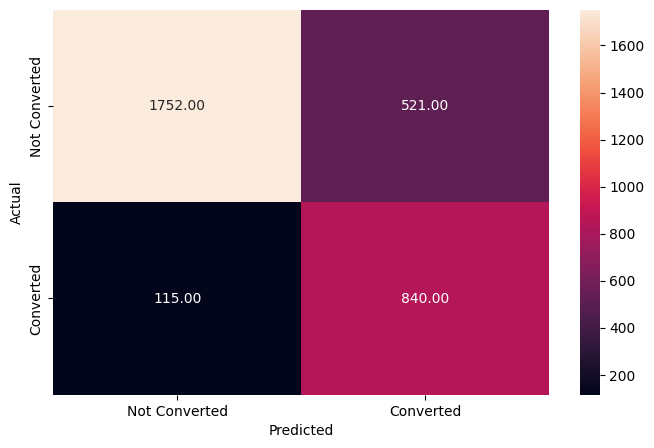

In [ ]:
# Checking the model performance on the Training set
DTree_Tuned_y_train_pred = DTree_Tuned.predict(x_train)
classifier_score(y_train, DTree_Tuned_y_train_pred)

**Observations**:
- Training Results of the optimized model show improved values of the target performance metric (recall_score on category 1)
- Moreover, other performance metrics like the number of false positives have increased. However this trade-off is acceptable as what we want to minimize is the number of false-negatives predicted by the model. This is what was optimized by the Tuning earlier.

              precision    recall  f1-score   support

           0       0.93      0.77      0.84       962
           1       0.62      0.86      0.72       422

    accuracy                           0.80      1384
   macro avg       0.77      0.82      0.78      1384
weighted avg       0.83      0.80      0.80      1384



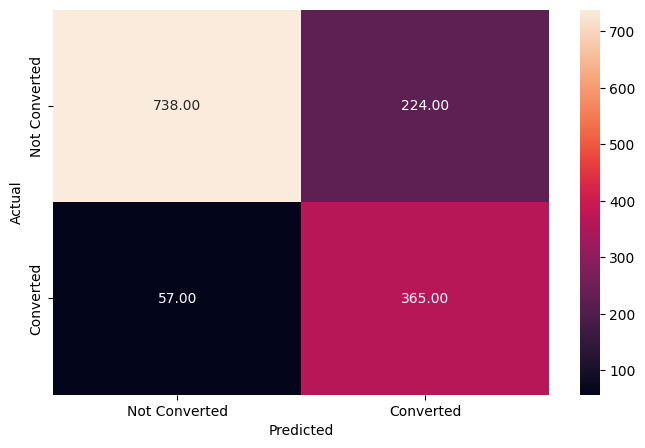

In [ ]:
# Checking the model performance on the Test set
DTree_Tuned_y_test_pred = DTree_Tuned.predict(x_test)
classifier_score(y_test, DTree_Tuned_y_test_pred)

**Observations**
- Test results of the model on unseen data show close values to that of the training results
- This indicates that overfitting has been avoided and confirmes the good generalization capability of the tuned model


> **Visualizing the Decision Tree**

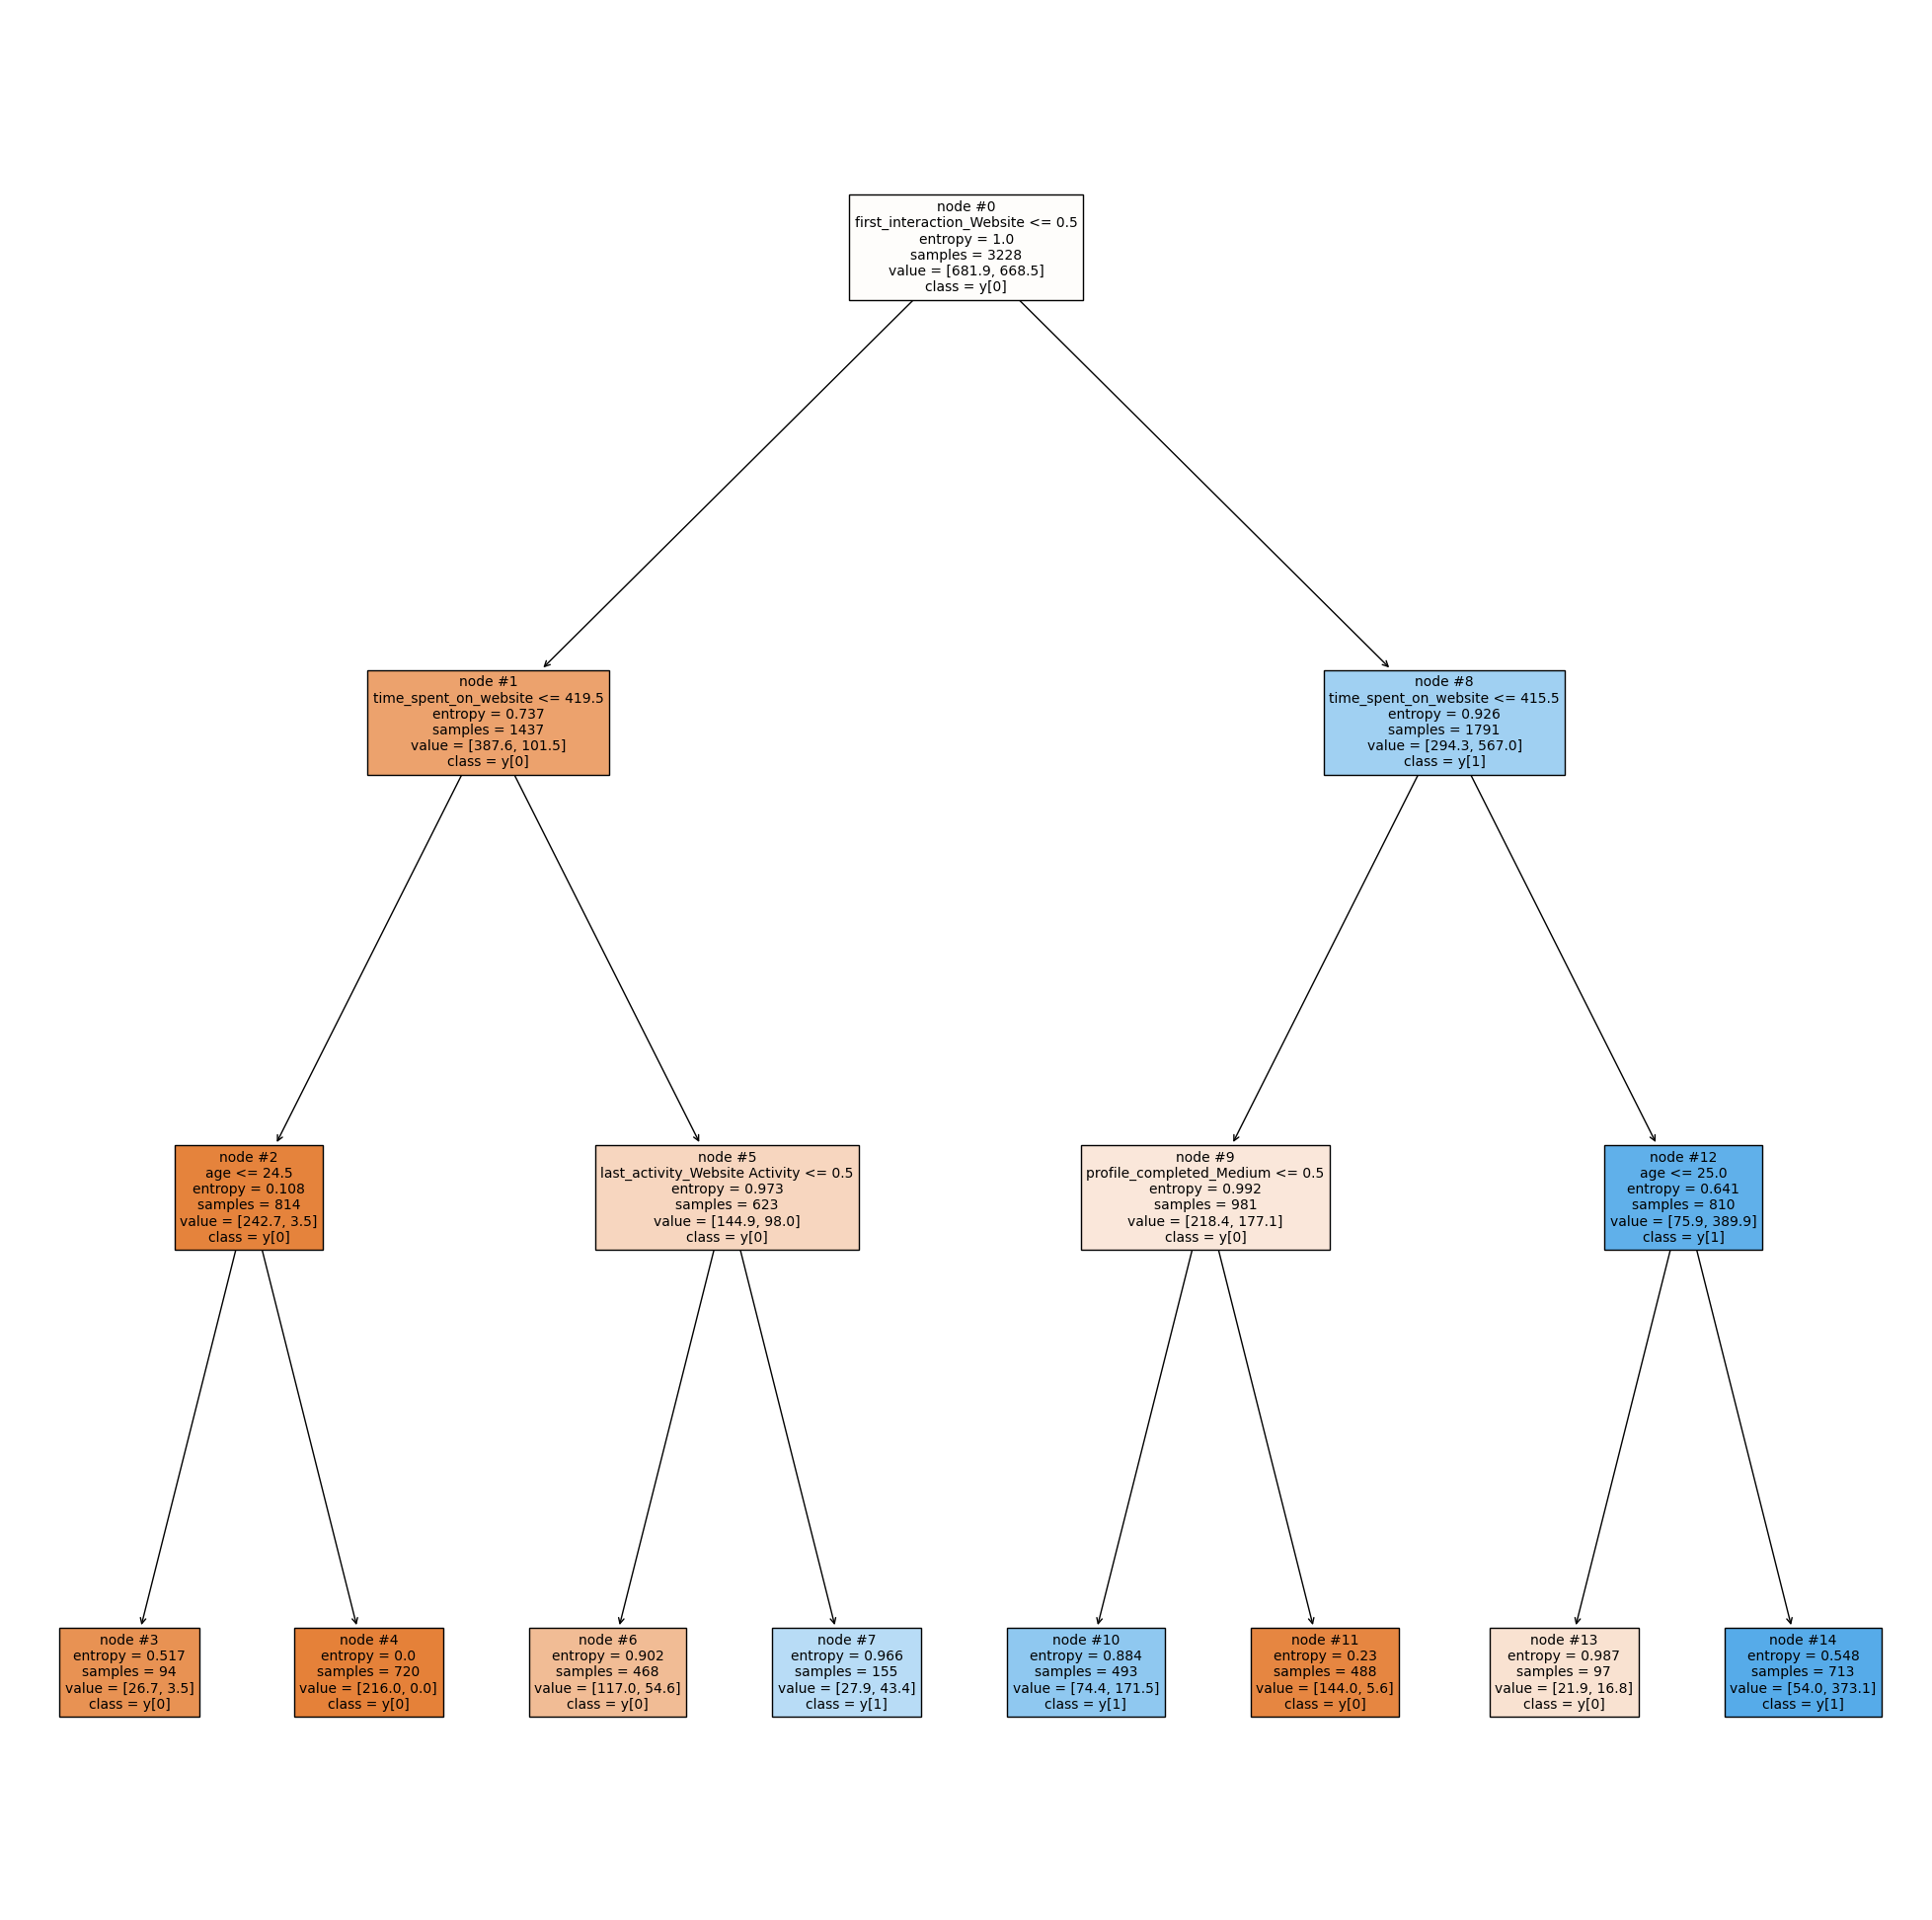

In [ ]:
# Visualizing the Decision Tree Derived using the tree.plot_tree method imported earlier

features = list(x.columns)
plt.figure(figsize = (25, 25))
tree.plot_tree(DTree_Tuned, feature_names = features, filled = True, fontsize = 10, node_ids = True, class_names = True)
plt.show()

**Decision Tree Analysis**

From the tree plot above it can be seen that the **feature with the biggest importance** is **first interaction being in the Website**

Conversion of Leads can be mapped by following the following routes down the decision tree

If first interaction is not website
- If the time spent on the website is > 419 s amd of the last activity of the lead is on the website then node 7 shows that the lead can be classified as a converted lead

If the first interaction is at the website
- if the time spent on the website is < 415s and the profile completed is not medium, then node 10 shows that the lead can be classified as converted lead
- on the other hand if the time spent on the website is > 415s and if the Lead's age is 25 yrs old then node 14 shows that the lead can be classified as a converted lead

> **Determining Feature Importance According to the Decision Tree**

In [ ]:
# Getting the Feature importances using Decision Tree Classifier
print(pd.DataFrame(DTree_Tuned.feature_importances_, columns = ["Importance"], index = x_train.columns).sort_values(by = 'Importance', ascending = False))

                                Importance
time_spent_on_website             0.348142
first_interaction_Website         0.327181
profile_completed_Medium          0.239274
age                               0.063893
last_activity_Website Activity    0.021511
website_visits                    0.000000
page_views_per_visit              0.000000
current_occupation_Student        0.000000
current_occupation_Unemployed     0.000000
profile_completed_Low             0.000000
last_activity_Phone Activity      0.000000
print_media_type1_Yes             0.000000
print_media_type2_Yes             0.000000
digital_media_Yes                 0.000000
educational_channels_Yes          0.000000
referral_Yes                      0.000000


- The Decision Tree classifier shows that features of greatest importance in determining whether or not a lead can be converted to a paying customer are
1. Time spent on the Website
2. First interactions being at the Website
3. Profile Completion being at medium level

#### **RandomForest Classifier**

> **Initial Model Building**

In [ ]:
# Instantiating a Random Forest classifier model
RForest = RandomForestClassifier()

# Fitting the Training Data
RForest.fit(x_train, y_train)

RandomForestClassifier()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2273
           1       1.00      1.00      1.00       955

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



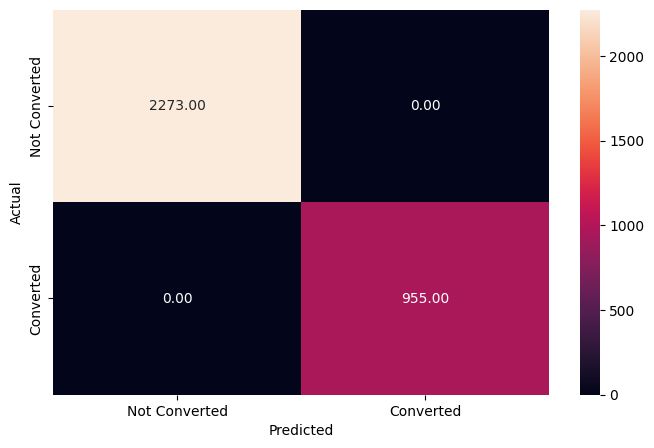

In [ ]:
# Checking the model performance on the Training set
DTree_y_train_pred = DTree.predict(x_train)
classifier_score(y_train, DTree_y_train_pred)

**Observations**
- Similar to the Decision Tree Classifier trained earlier, the results show no False Positive and False Negative Errors
- Again, this could be indicative of overfitting on the training data. Which we will again confirm by testing on the test dataset


              precision    recall  f1-score   support

           0       0.88      0.93      0.90       962
           1       0.81      0.71      0.75       422

    accuracy                           0.86      1384
   macro avg       0.84      0.82      0.83      1384
weighted avg       0.86      0.86      0.86      1384



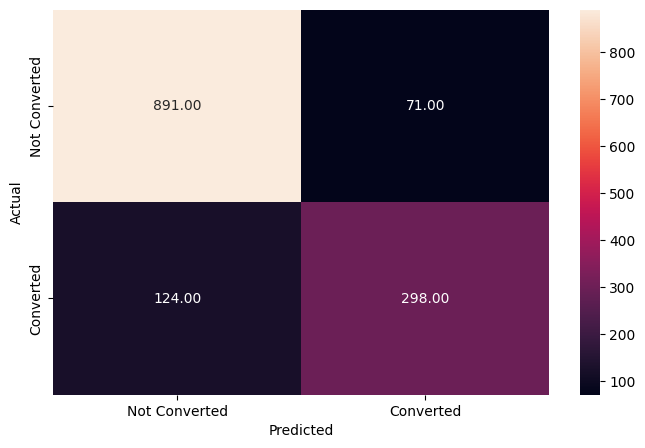

In [ ]:
# Checking the performance of the Random Forest Model on the Test dataset
RForest_y_test_pred = RForest.predict(x_test)
classifier_score(y_test, RForest_y_test_pred)

**Observations**
- Comparatively, the MOdel Performance indicators for the test data are lower compared to that of the training results
- This confirms that indeed the Random Forest Classifier has overfitted and should undergo parameter tuning to increase the generalization capability


> **Optimizing the RandomForest Classifier via Hyperparameter Tuning**

In [ ]:
# Optimizing the Random Forest Classifier via Hyperparameter Tuning using GridSearchCV method
# This is done to reduce overfitting of the model

RForest_tuned = RandomForestClassifier(random_state = 1)

# Setting the parameters that will be passed through in the grid search algorithm
params = {'max_depth': np.arange(2,15),
          'criterion': ['gini', 'entropy'],
          'min_samples_leaf': [5, 10, 20, 25],
          'class_weight': ['balanced', {0: 0.3, 1: 0.7}] }

# setting the recall_score to be the scorer
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Running the grid search
gridsearch_obj2 = GridSearchCV(RForest_tuned, param_grid = params, scoring = scorer, cv = 5)

# Fitting the training data on the instantiated gridsearch object
gridsearch_obj2 = gridsearch_obj2.fit(x_train, y_train)

# Getting the Model with the best combination of Parameters
RForest_Tuned = gridsearch_obj2.best_estimator_

# Fitting the data to the best model
RForest_Tuned = RForest_Tuned.fit(x_train, y_train)

              precision    recall  f1-score   support

           0       0.94      0.82      0.87      2273
           1       0.67      0.88      0.76       955

    accuracy                           0.84      3228
   macro avg       0.81      0.85      0.82      3228
weighted avg       0.86      0.84      0.84      3228



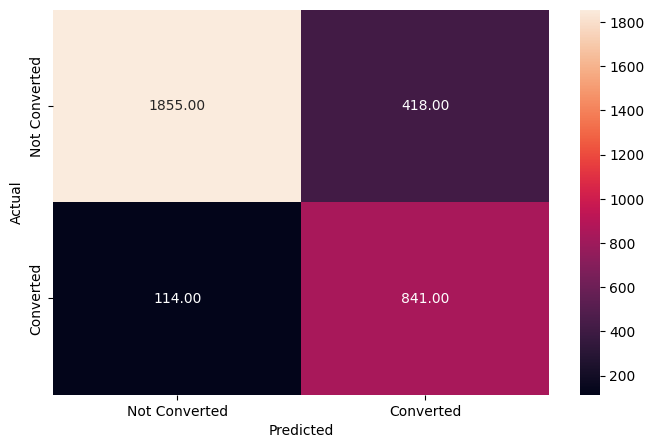

In [ ]:
# Checking the model performance on the Training set
RForest_Tuned_y_train_pred = RForest_Tuned.predict(x_train)
classifier_score(y_train, RForest_Tuned_y_train_pred)

**Observations**
- After Parameter Tuning, it can be seen that the performance metric of interest, which is the recall score for class 1 has increased significantly (minimized the chances of classifying False negatives) at the expense of increasing the number false positives
- The recall score is relatively the same compared to the one obtained in the Tuned DecisionTree Classifier


              precision    recall  f1-score   support

           0       0.93      0.82      0.87       962
           1       0.67      0.86      0.75       422

    accuracy                           0.83      1384
   macro avg       0.80      0.84      0.81      1384
weighted avg       0.85      0.83      0.83      1384



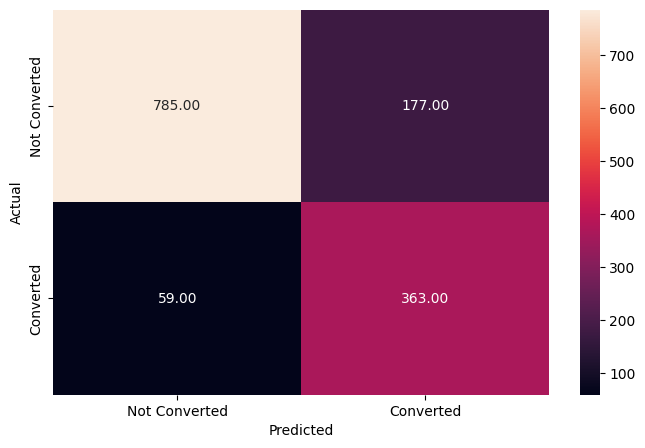

In [ ]:
# Checking the model performance on the Test set
RForest_Tuned_y_test_pred = RForest_Tuned.predict(x_test)
classifier_score(y_test, RForest_Tuned_y_test_pred)

**Observations**
- Upon Comparision, the performance of the Tuned Random Forest Classifier on the test data is relatively the same as that on the training data
- This confirms the good generalization capability of the classifier as well as the effectiveness of the Random Forest Algorithm in significantly decreasing the chances of overfitting


> **Determining Feature Importance as predicted by the Random Forest Classifier**

In [ ]:
# Getting the Feature importances using Decision Tree Classifier
print(pd.DataFrame(RForest_Tuned.feature_importances_, columns = ["Importance"], index = x_train.columns).sort_values(by = 'Importance', ascending = False))

                                Importance
time_spent_on_website             0.327117
first_interaction_Website         0.326496
profile_completed_Medium          0.144391
age                               0.055560
current_occupation_Student        0.032222
last_activity_Phone Activity      0.030434
page_views_per_visit              0.020673
last_activity_Website Activity    0.018329
current_occupation_Unemployed     0.014316
website_visits                    0.011346
profile_completed_Low             0.009737
referral_Yes                      0.005085
educational_channels_Yes          0.001491
print_media_type1_Yes             0.001439
print_media_type2_Yes             0.000855
digital_media_Yes                 0.000510


- The tuned Random Forest classifier shows that features of greatest importance in determining whether or not a lead can be converted to a paying customer are
1. Time spent on the Website
2. First interactions being at the Website
3. Profile Completion being at medium level

- These results are similar to the ones obtained using the Decision Tree classifier earlier with the sole exception that the feature importance values for the other features are non-zero in this case

### **Conclusions and Recommendations**

**Summary of Model Building**

In this study, **two Machine Learning models for classification** were trained and **tuned with the aim of minimizing the likelihood of getting Flase Negative Classifying Errors**. Both **final, tuned versions of the Decision Tree and Random Forest Classifiers exhibited good performance** and were able to **give the same results for the top features that** can be said to help **determine whether or not a lead can be converted to a paying customer.**

From both Classifying Models, the Top 3 features are:
1. Time spent on the Website
2. First interactions being at the Website
3. Profile Completion being at medium level

However, it must be noted that the feature importance vectors shown above can give us insights on which features have the most impact on the target variable, it does not give the exact correlation since all values reported are positive. This means that this feature importance vector alone will not be able to tell how to change the values of these features (increase or decrease) in order to increase the likelihood of the Target variable being classified as class 1. These results should be coupled with the exploratory data analysis done in the previous sections.

**Business Recommendations:**
- From the results it can be seen that the Company Website is one of the things that should be given focus to as it has the largest evident impact that can increase the likelihood of a lead being converted to a paying customer. POssible strategoes could include: Company employees binge more pro-active in enaging leads through the Website. Increasing Accessibility and awareness of the website via promotion/avertisement events or the use of redirecting Ads. Finally, Other further improvements on the website can be looked into:
  - Improvement of the interface
  - Inclusion of Digital helpers (ex. AI chatbots)
- The company should also incentivize leads to complete their profiles. This is to help understand the target consumers (ex. knowing what the lead is looking for, their expectations, goals etc) so as to make it easier to convince them of the company's program
- Conversion rates of Referrals are also high. THis could mean that people's testimonies (good words about the company's program) have large effects on the lead's decision. The company should also put more effeorts such that more people get referred to the program
- Aside from referrals, from the exploratory data analysis, it was revealed that the leads' exposure to the company via different media (newspaper, magazine, online, educational_channels) are very abysmal. While the conversion rates within these features are not as high compared to referrals, the company should nevertheless put more effort in making its presence known to its target consumers.
- For targeting leads, the company could also focus on those who are at the professional level as the analysis has shown that they are more likely to enrol or avail the company's program